In [1]:
import os
from tqdm import tqdm
import soundfile as sf

from src.Utility import loadDir
from src.Analysis import Analysis
from src.Database import Database

In [2]:
class Config:
    tracks = 1
    segments = 30
    seconds = 1
    rate = 22050
    data_dir = 'data'
    lib_dir = 'D:\\Musik\\Genres\\'
    exc_dir = ['DnB', 'Trash', 'Other', 'JumpUp']
    sub_dir = os.path.join(data_dir, f'{tracks}x{segments}x{seconds}')
config = Config()

In [3]:
import pandas as pd
import sklearn.preprocessing as skp
import matplotlib.pyplot as plt
import seaborn as sns

def display(df):
    data = df.iloc[0:, 1:]
    y = data['label']
    X = data.loc[:, data.columns != 'label']

    # normalize
    cols = X.columns
    min_max_scaler = skp.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(X)
    X = pd.DataFrame(np_scaled, columns = cols)

    # Top 2 pca components
    from sklearn.decomposition import PCA

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

    # concatenate with target label
    finalDf = pd.concat([principalDf, y], axis = 1)

    plt.figure(figsize = (16, 9))
    sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);
    plt.title('PCA on Genres', fontsize = 20)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 10)
    plt.xlabel("Principal Component 1", fontsize = 15)
    plt.ylabel("Principal Component 2", fontsize = 15)
    plt.savefig(os.path.join(config.sub_dir, "PCA_Scattert.png"))

In [4]:
def isAcceptedFormat(file: str) -> bool:
    return os.path.splitext(file)[-1] in ['.wav', '.mp3']

 -> 1.	Blues:	████████████████████ 30/30 [00:05 -> 00:00]


no


 -> 2.	Breakcore:	████████████████████ 30/30 [00:12 -> 00:00]


no


 -> 3.	Classical:	████████████████████ 30/30 [00:04 -> 00:00]


no


 -> 4.	Country:	████████████████████ 30/30 [00:04 -> 00:00]

no



 -> 5.	Crossbread:	████████████████████ 30/30 [00:11 -> 00:00]

no



 -> 6.	Dancefloor:	████████████████████ 30/30 [00:11 -> 00:00]

no



 -> 7.	Deep:	████████████████████ 30/30 [00:05 -> 00:00]


no


 -> 8.	Disco:	████████████████████ 30/30 [00:03 -> 00:00]

no


 -> 9.	DnB: excluded.


 -> 10.	Drumstep:	████████████████████ 30/30 [00:11 -> 00:00]

no



 -> 11.	Dubstep:	████████████████████ 30/30 [00:11 -> 00:00]


no


 -> 12.	Goa:	████████████████████ 30/30 [00:12 -> 00:00]


no


 -> 13.	Hardtekk:	████████████████████ 30/30 [00:12 -> 00:00]


no


 -> 14.	Hiphop:	████████████████████ 30/30 [00:04 -> 00:00]


no


 -> 15.	Jazz:	████████████████████ 30/30 [00:12 -> 00:00]

no


 -> 16.	JumpUp: excluded.


 -> 17.	Jungle:	████████████████████ 30/30 [00:05 -> 00:00]

no



 -> 18.	Liquid:	████████████████████ 30/30 [00:12 -> 00:00]


no


 -> 19.	Metal:	████████████████████ 30/30 [00:04 -> 00:00]

no



 -> 20.	Minimal:	████████████████████ 30/30 [00:12 -> 00:00]

no



 -> 21.	Neurofunk:	████████████████████ 30/30 [00:11 -> 00:00]


no
 -> 22.	Other: excluded.


 -> 23.	Pop:	████████████████████ 30/30 [00:04 -> 00:00]

no



 -> 24.	PsyTrance:	████████████████████ 30/30 [00:12 -> 00:00]


no


 -> 25.	Reggae:	████████████████████ 30/30 [00:04 -> 00:00]


no


 -> 26.	Riddim:	████████████████████ 30/30 [00:05 -> 00:00]


no


 -> 27.	Rock:	████████████████████ 30/30 [00:04 -> 00:00]

no



 -> 28.	Sambass:	████████████████████ 30/30 [00:12 -> 00:00]

no



 -> 29.	Shriek:	████████████████████ 30/30 [00:11 -> 00:00]

no



 -> 30.	Techno:	████████████████████ 30/30 [00:11 -> 00:00]

no
 -> 31.	Trash: excluded.



 -> 32.	UKay:	████████████████████ 30/30 [00:06 -> 00:00]

no


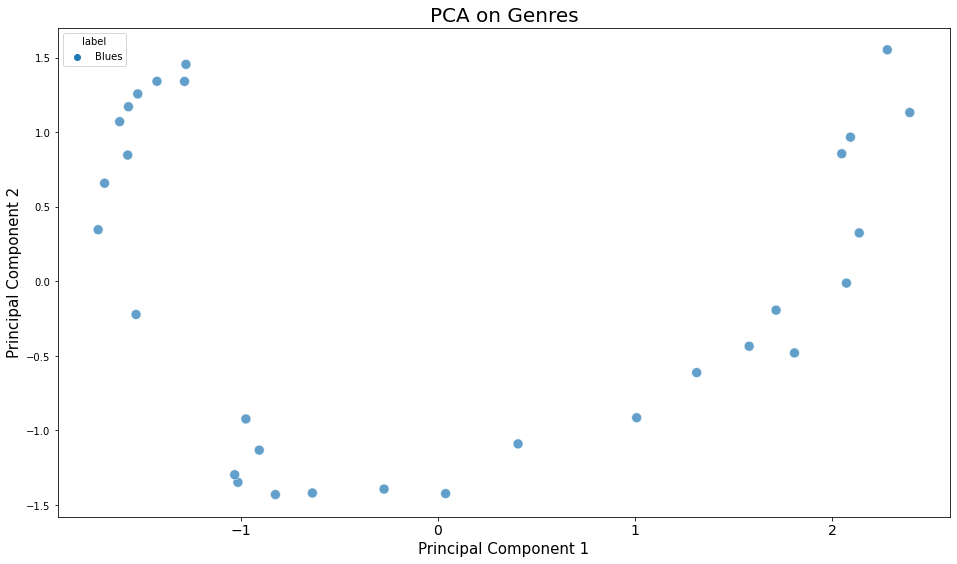

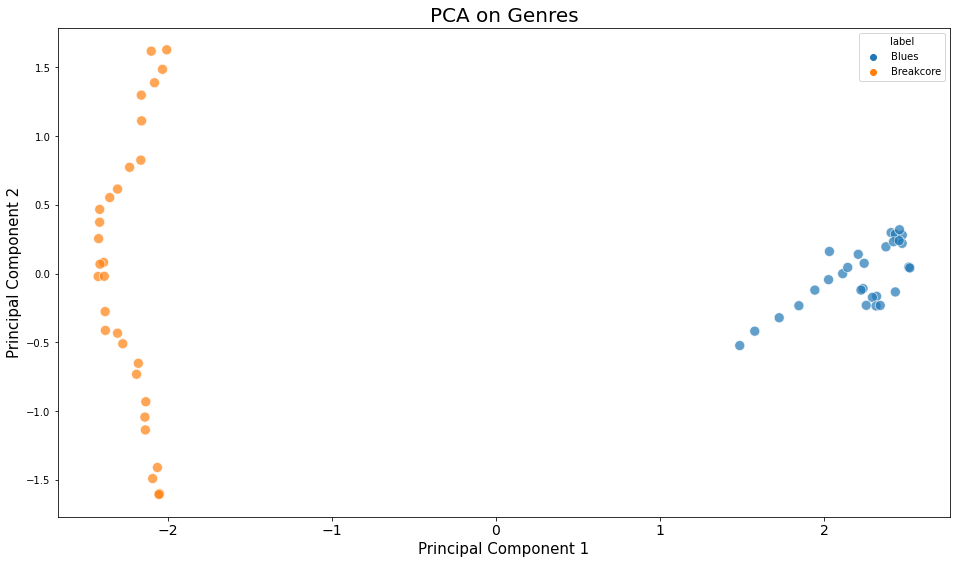

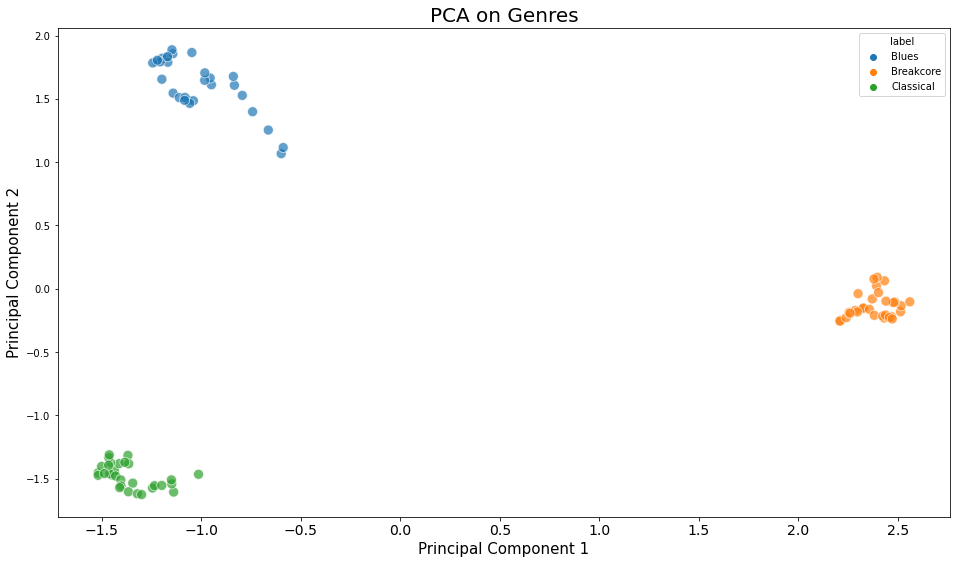

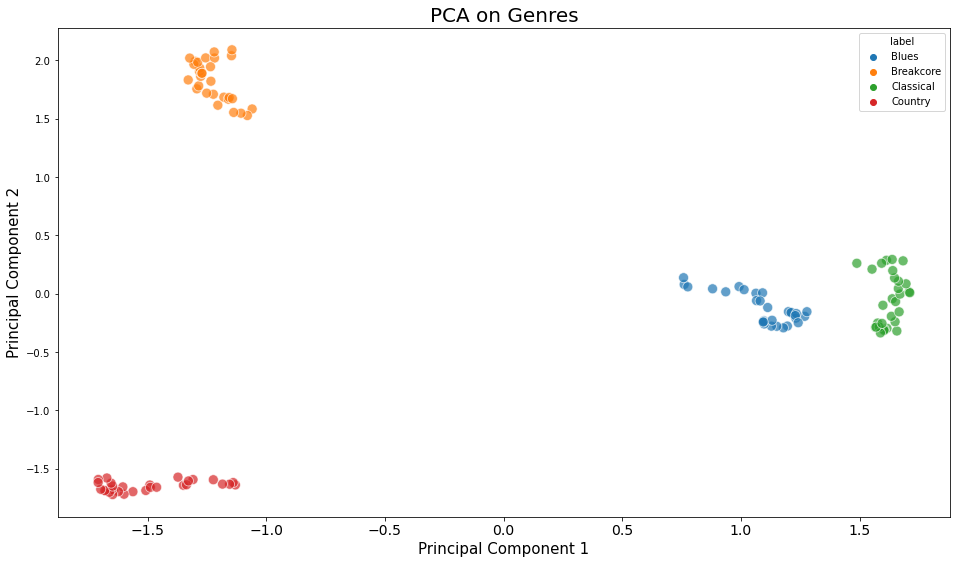

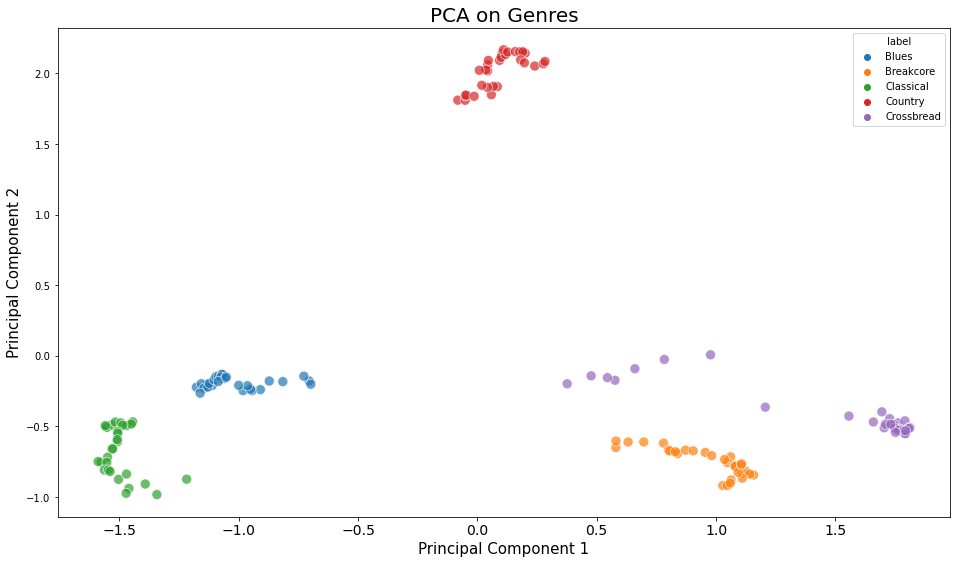

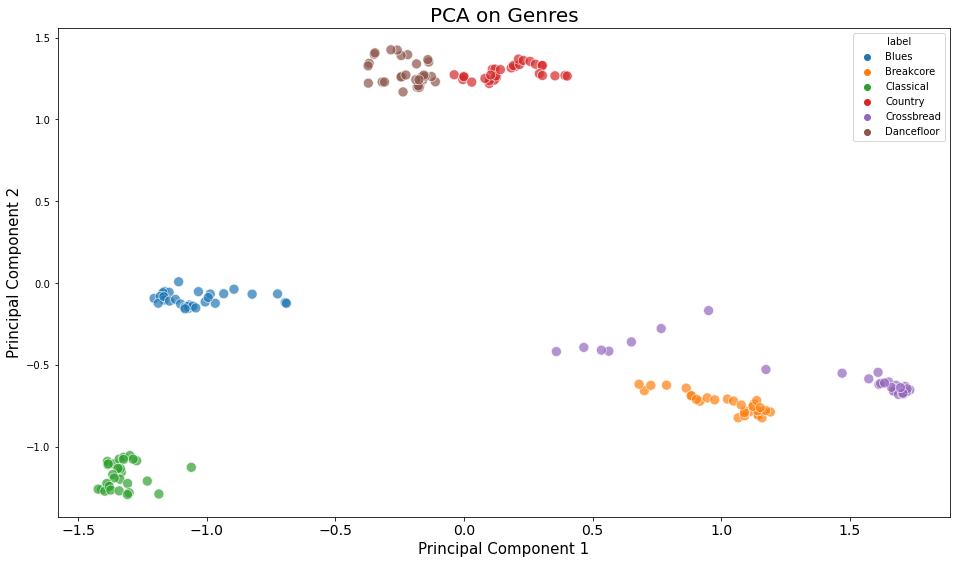

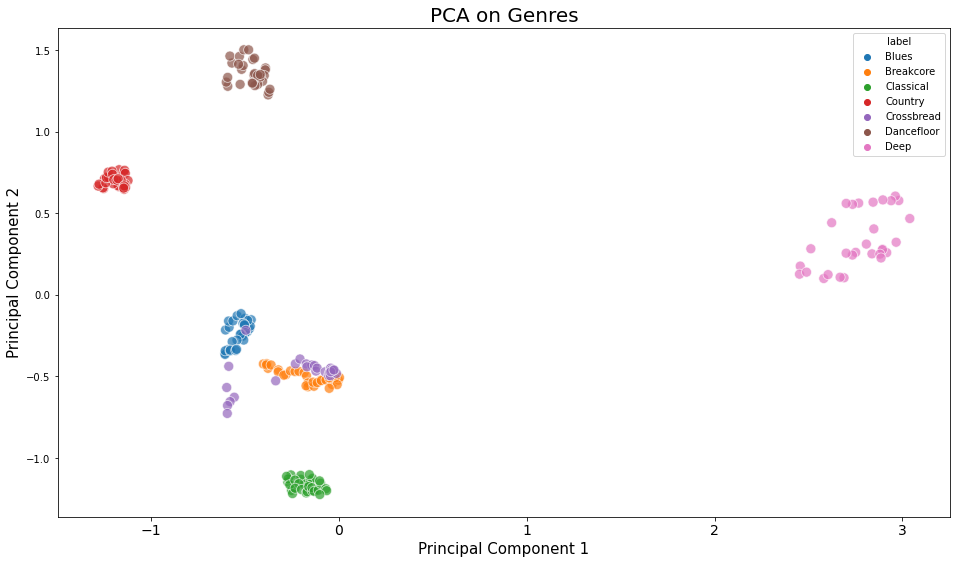

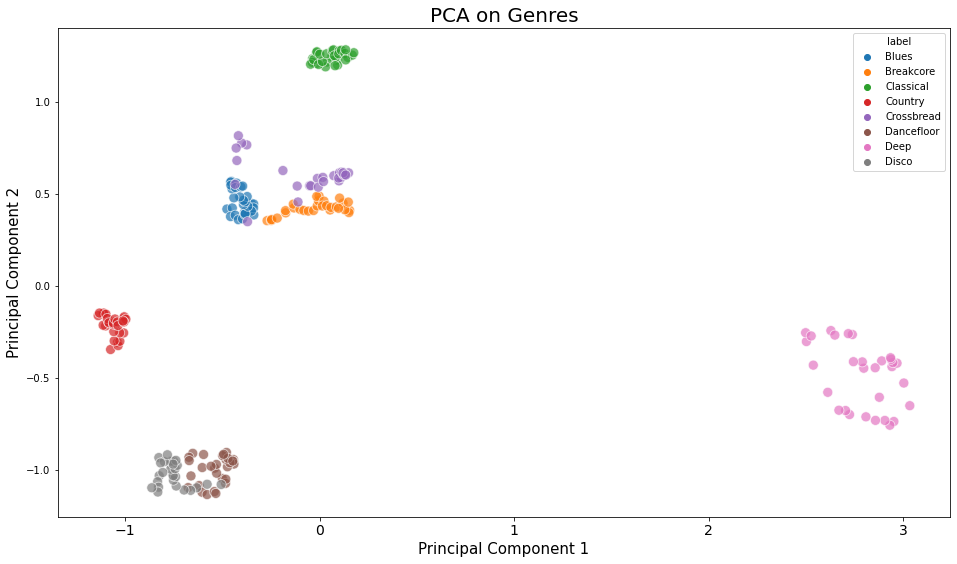

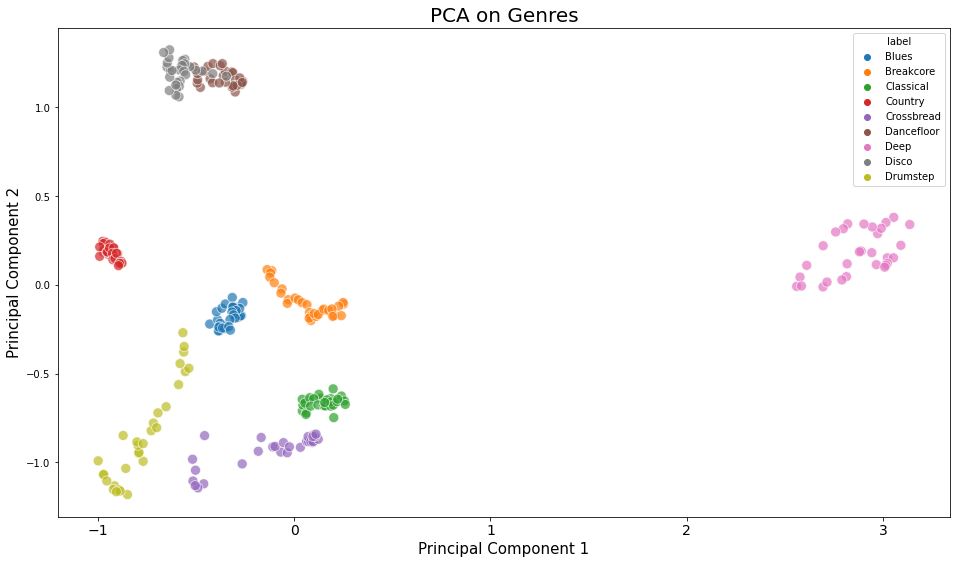

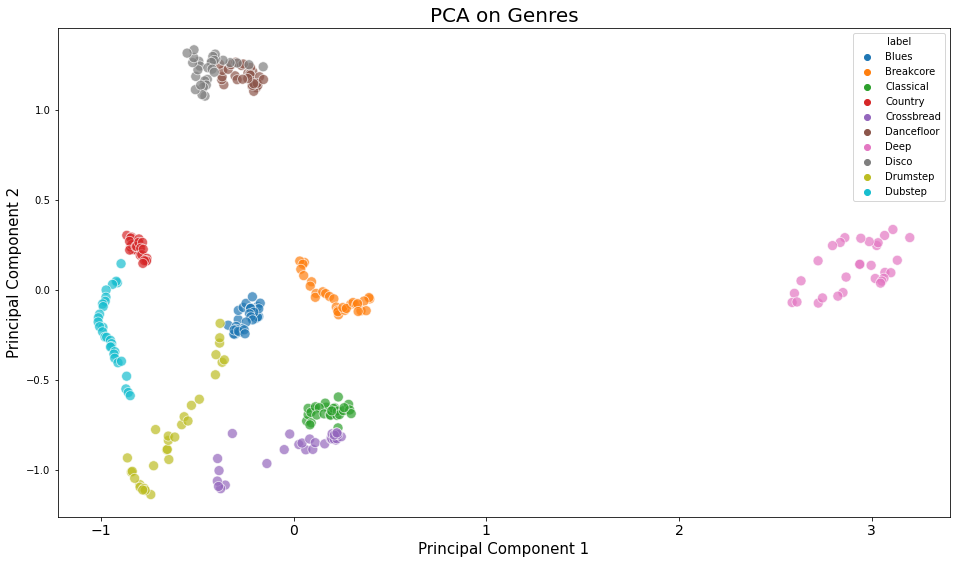

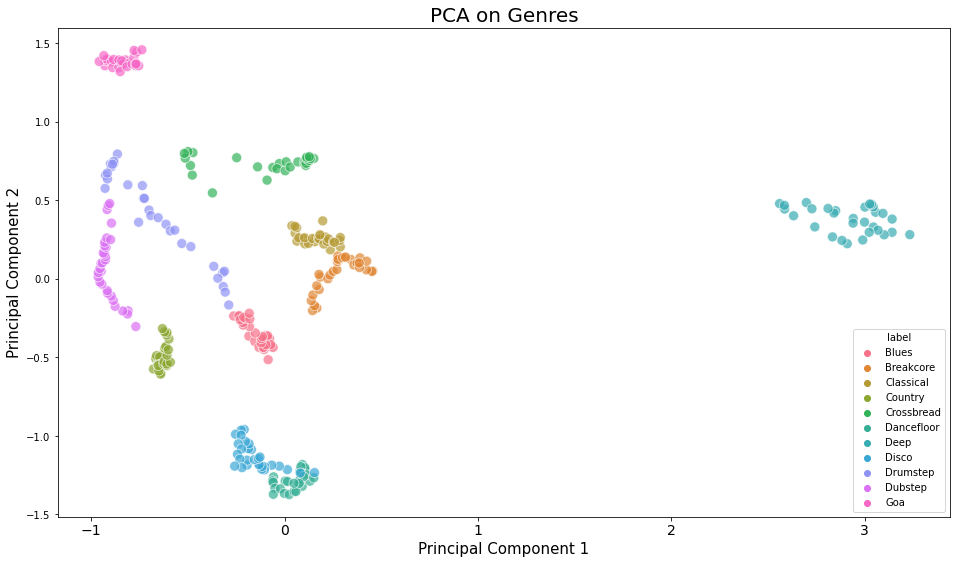

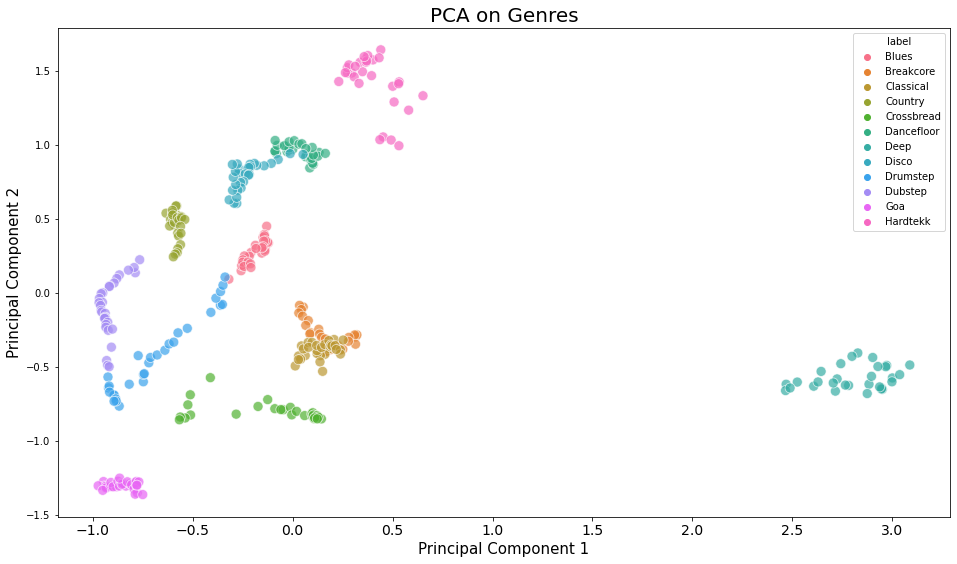

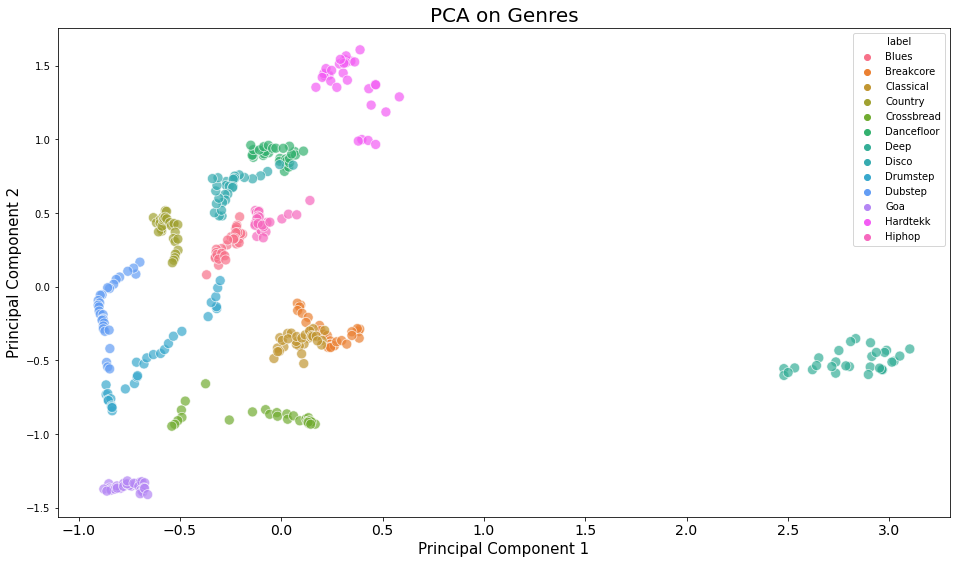

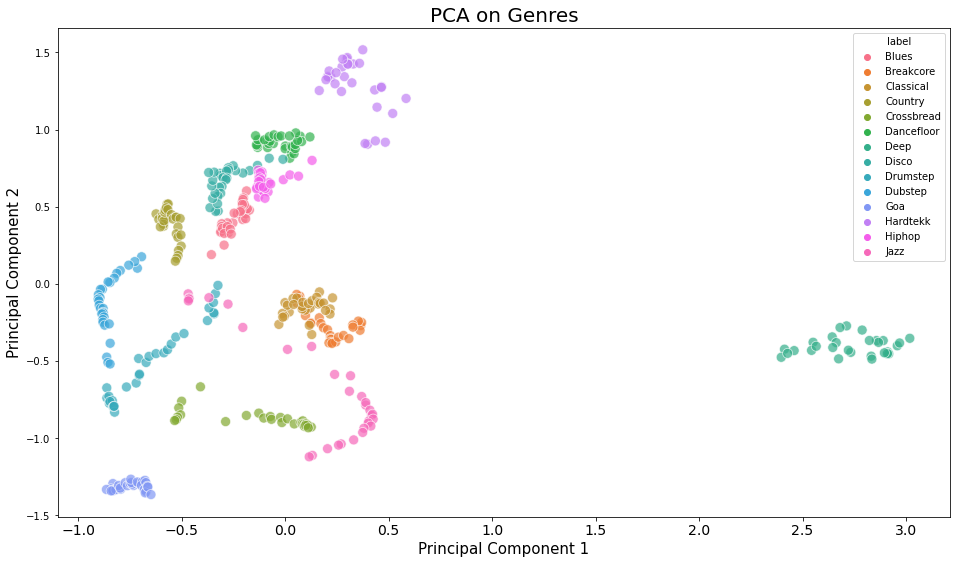

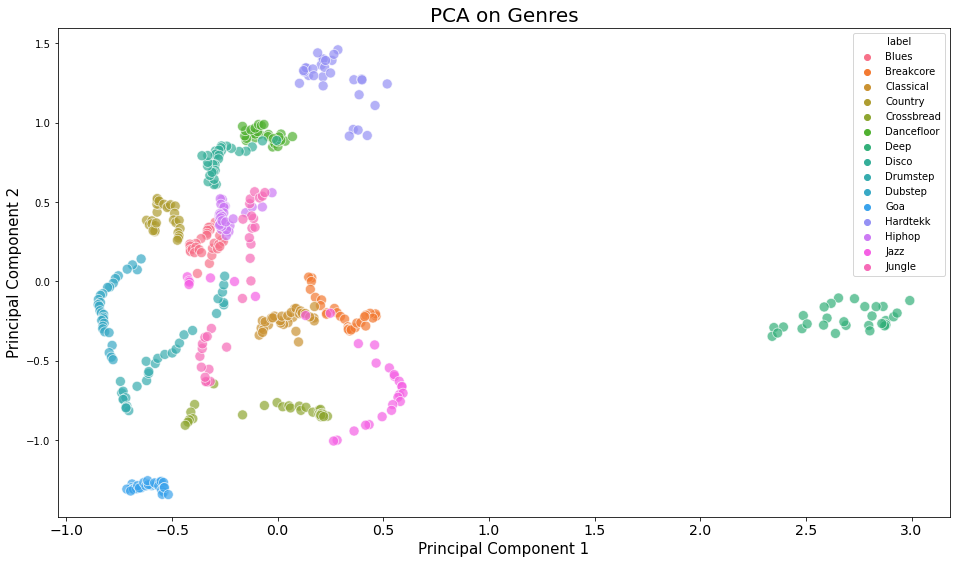

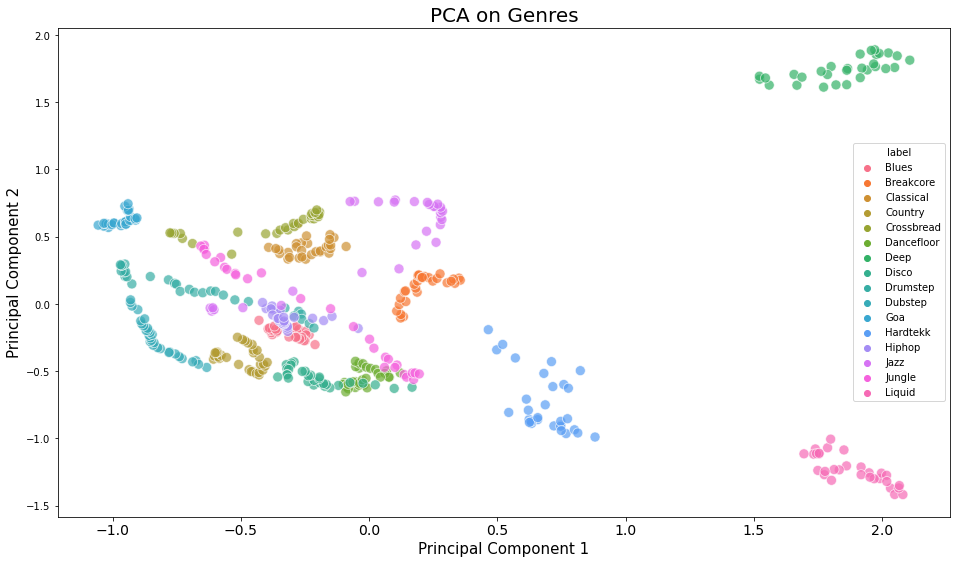

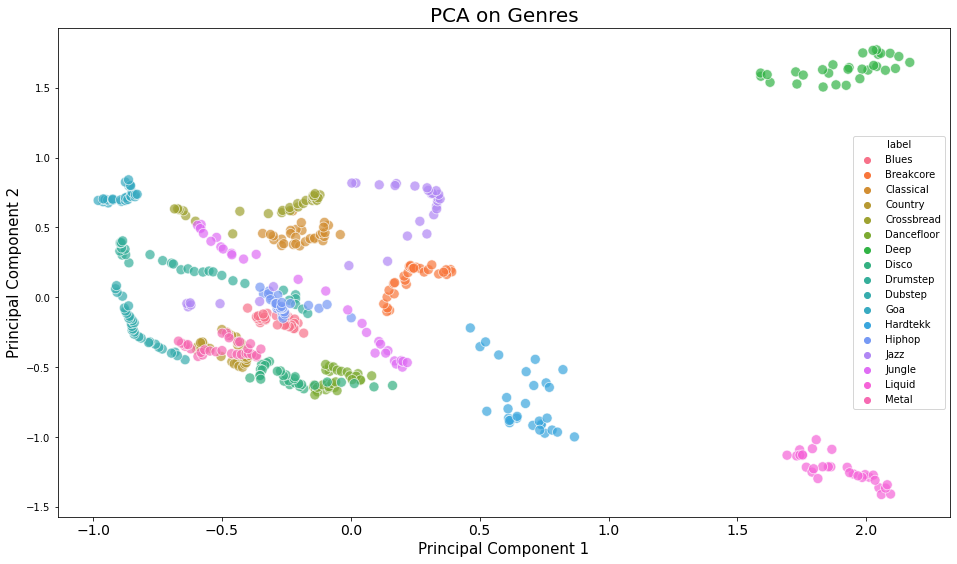

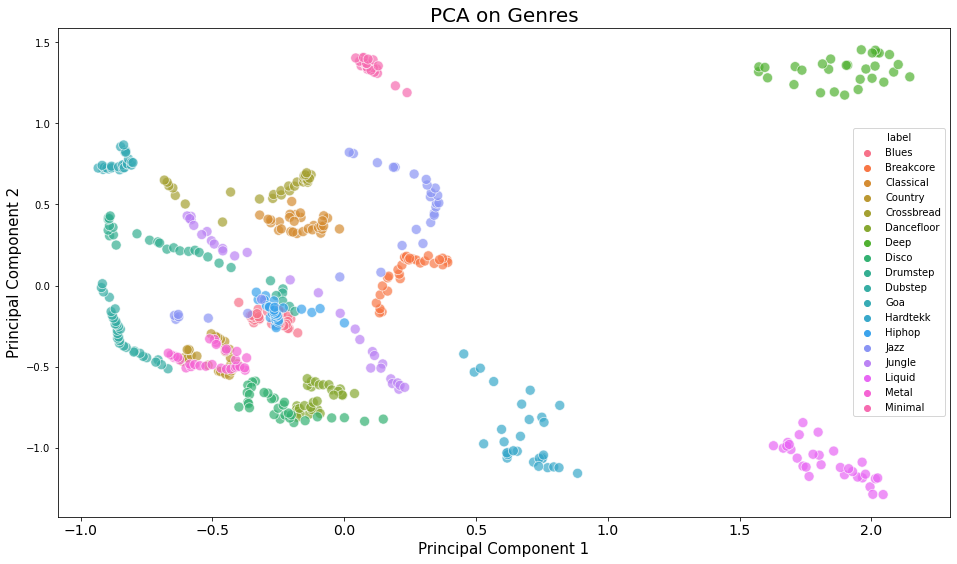

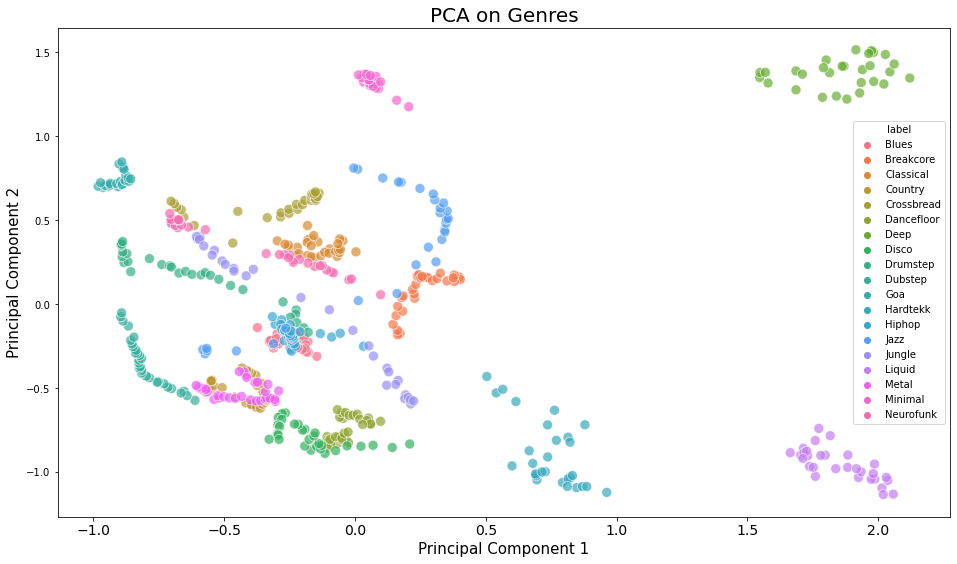

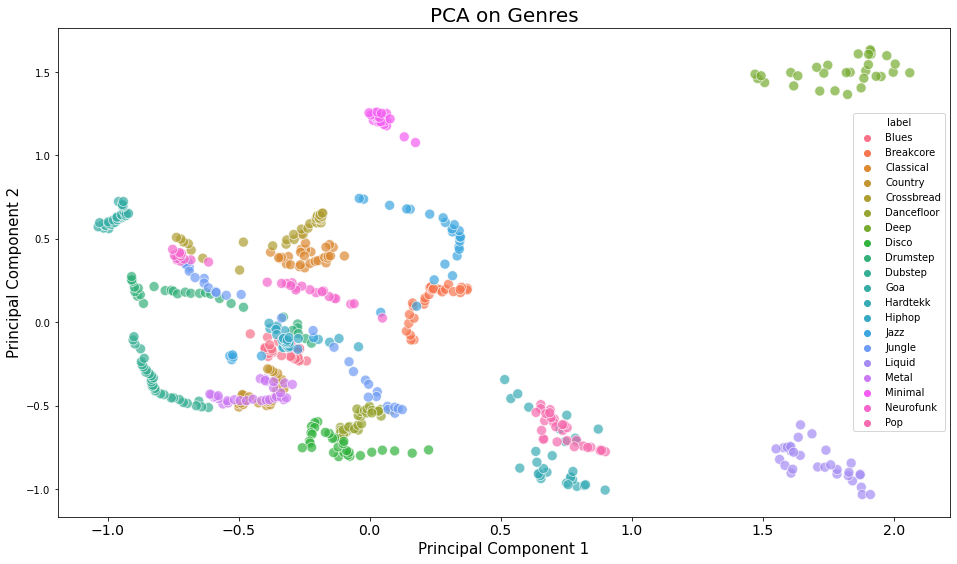

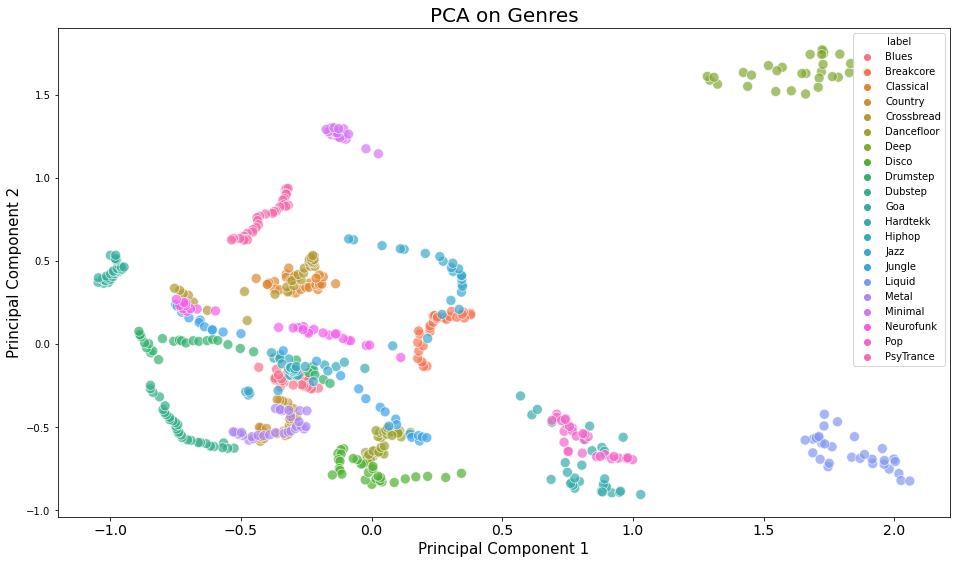

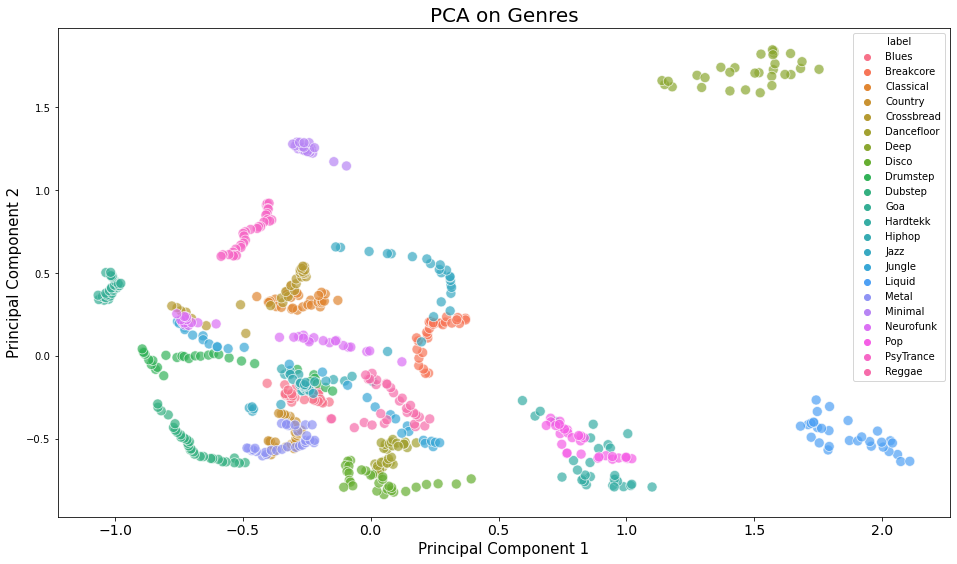

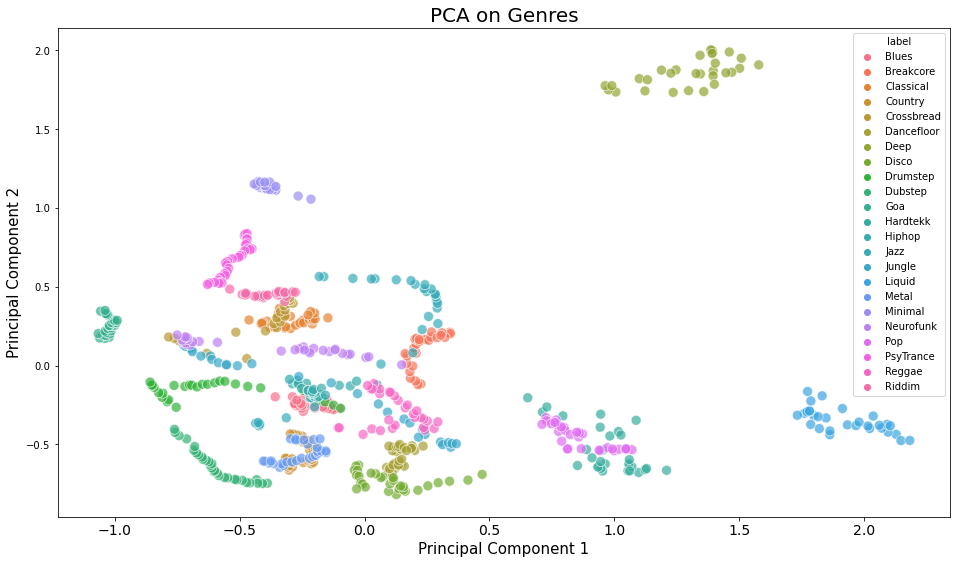

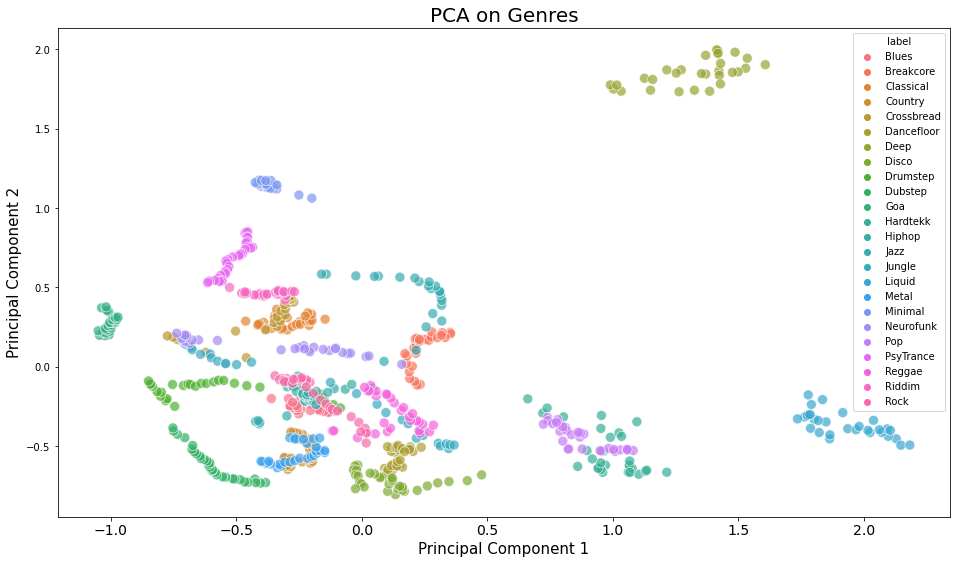

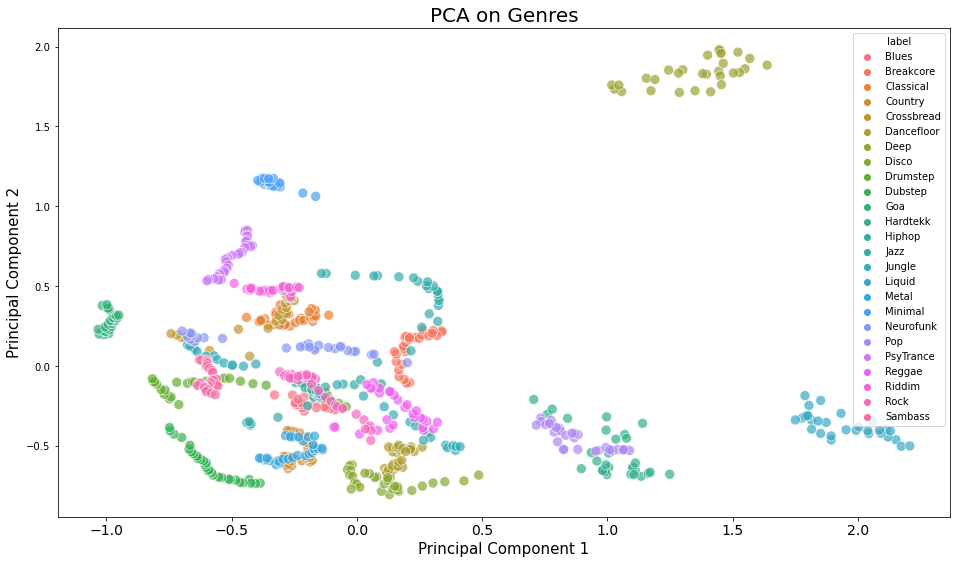

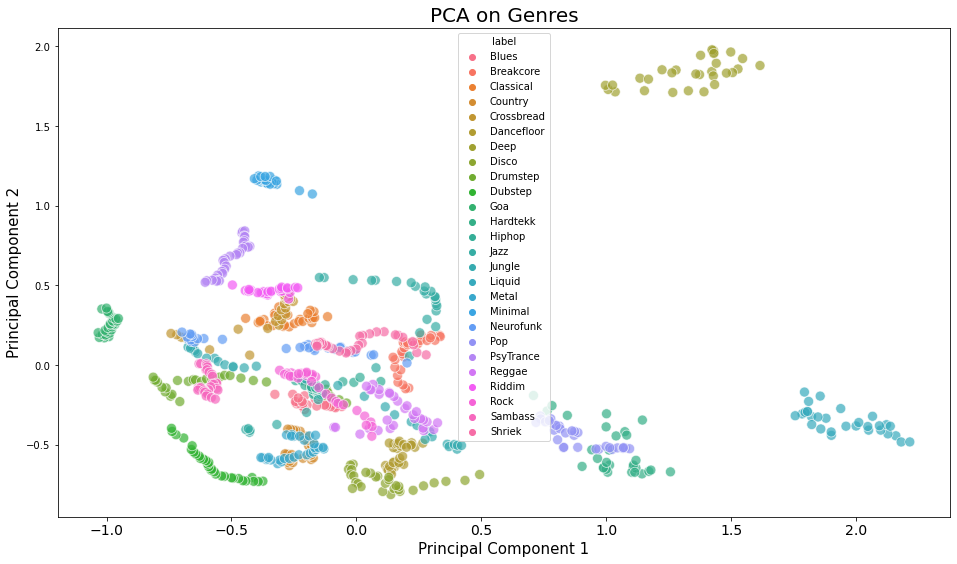

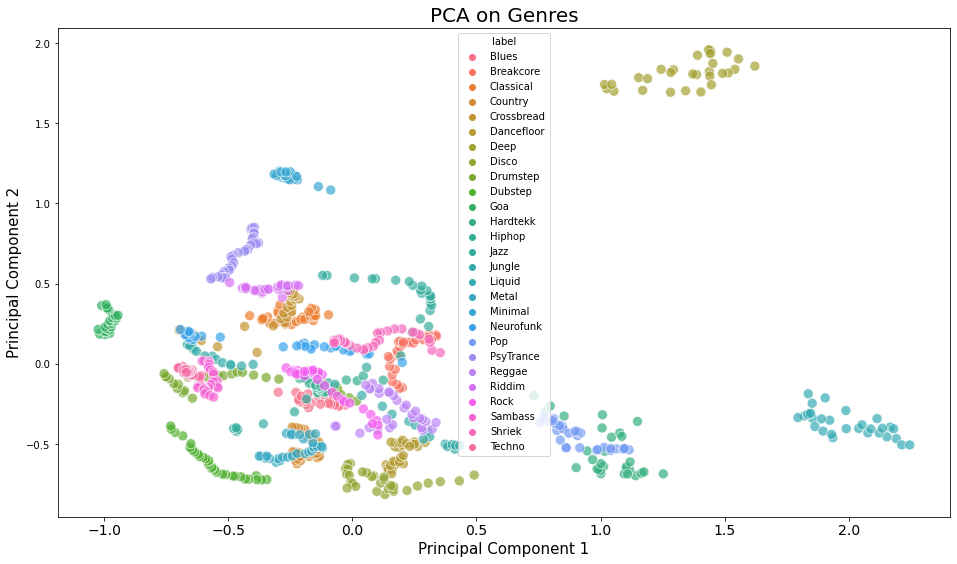

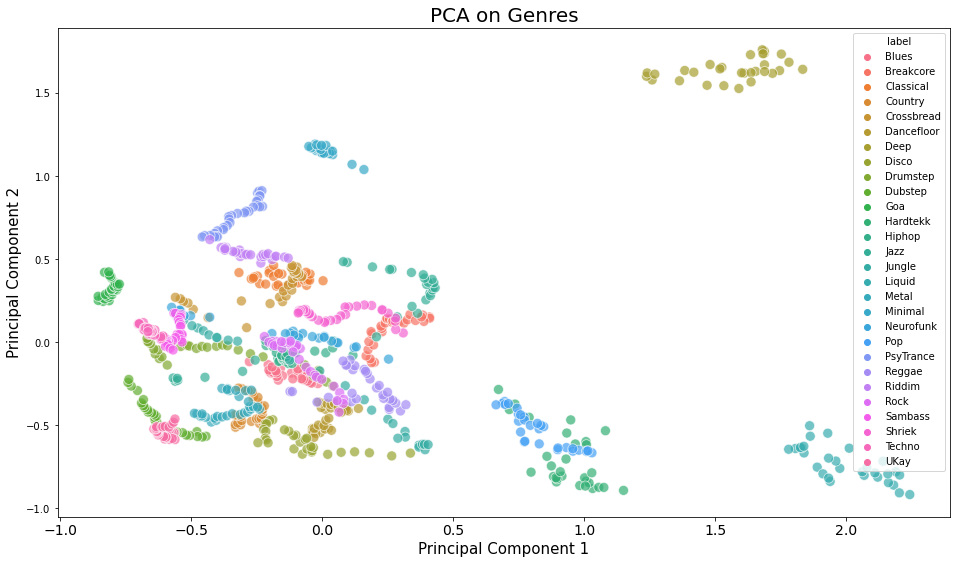

In [5]:
for index_dir, dir in enumerate(os.listdir(config.lib_dir)):
    __FIRST = True
    files, genre = loadDir(os.path.join(config.lib_dir, dir))
    db = Database(config.sub_dir, genre)
    if(len(files) == 0):
        print(f' -> {index_dir + 1}.\t{genre}: empty.')
        continue

    if(len(files) < config.tracks):
        print( f' -> {index_dir + 1}.\t{genre}: missing {config.tracks - len(files)}')
        continue

    if(dir in config.exc_dir):
        print(f' -> {index_dir + 1}.\t{genre}: excluded.')
        continue

    if (db.count('label', genre) / config.segments >= config.tracks):
        print(f' -> {index_dir + 1}.\t{genre}: satisfied with {db.count("label", genre)} files.')
        continue

    __bar = tqdm(total=(config.tracks) * config.segments, 
                 desc=f' -> {index_dir + 1}.\t{genre}:',
                 bar_format="{desc}\t{bar:20} {n_fmt}/{total_fmt} [{elapsed} -> {remaining}]",
                 initial=db.count('label', genre))

    for file_path in files:
        if(db.count('label', genre) / config.segments >= config.tracks):
            break

        if not isAcceptedFormat(file_path):
            continue

        if(db.alreadyExsist(file_path)):
            continue 

        alyis = Analysis(audio_path=file_path, options=config, _bar = __bar)

        try:
            alyis.loadAudioData()
        except Exception:
            continue
        
        db.push(alyis.calculate(), file_path)
        display(db.df)
        db.save()

        if __FIRST:
            __FIRST = False
            if not os.path.exists(os.path.join(config.sub_dir, 'audio')):
                    os.makedirs(os.path.join(config.sub_dir, 'audio'))
            sf.write(os.path.join(config.sub_dir, 'audio' ,f'{genre}.wav'), alyis.segments[4].audio_data, config.rate)
    __bar.close()
    